# Importing Libraries



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# iDMRG for spin-1/2 Heisenberg Model

In [ ]:
params = {'psi': 0}

In [ ]:
def wfTwoQbit(psi):
    """ Returns the wf of the system as a function of `psi`.

    The (normalized) wavefunction of the two-qbit system can be
    parametrized as a function an angle `psi`.

    Parameters
    ----------
    psi : a double
        Parametrizes the wavefunction.

    Returns
    -------
    result : a Wavefunction
        The wavefunction of the two-qbit system for the given `psi`.
    """
    result = np.zeros((2,2))

    # set the different components.
    result[0,1] = np.cos(psi)
    result[1, 0] = np.sin(psi)
    return result

wf = wfTwoQbit(params["psi"])

array([[0., 1.],
       [0., 0.]])

In [ ]:
def reducedDensityMatrix(wf):


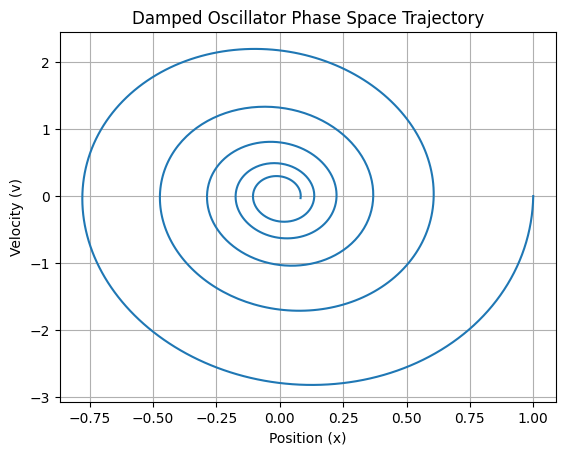

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def damped_oscillator_trajectory(m, b, k, x0, v0, dt, num_steps):
    # Initialize arrays to store position and velocity values
    positions = np.zeros(num_steps)
    velocities = np.zeros(num_steps)

    # Initial conditions
    positions[0] = x0
    velocities[0] = v0

    # Euler's method to update position and velocity
    for i in range(1, num_steps):
        acceleration = (-b * velocities[i-1] - k * positions[i-1]) / m
        velocities[i] = velocities[i-1] + acceleration * dt
        positions[i] = positions[i-1] + velocities[i] * dt

    return positions, velocities

# Parameters
m = 1.0     # Mass
b = 0.5     # Damping coefficient
k = 10.0    # Spring constant
x0 = 1.0    # Initial displacement
v0 = 0.0    # Initial velocity

# Time parameters
dt = 0.01   # Time step
num_steps = 1000

# Calculate trajectory
positions, velocities = damped_oscillator_trajectory(m, b, k, x0, v0, dt, num_steps)

# Plot phase space trajectory
plt.plot(positions, velocities)
plt.title('Damped Oscillator Phase Space Trajectory')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.grid(True)
plt.show()

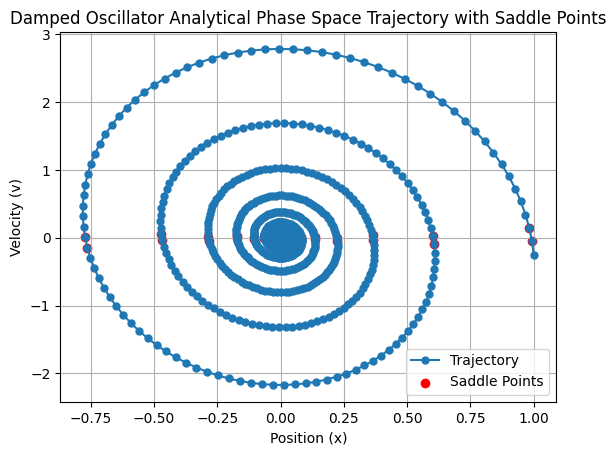

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def damped_oscillator_analytical(m, b, k, A, B, t):
    omega_d = np.sqrt(k/m - (b/(2*m))**2)
    x = np.exp(-b/(2*m)*t) * (A * np.cos(omega_d * t) + B * np.sin(omega_d * t))
    v = -b/(2*m) * x + np.exp(-b/(2*m)*t) * (A * omega_d * np.sin(omega_d * t) - B * omega_d * np.cos(omega_d * t))
    return x, v

def find_saddle_points(positions, velocities):
    saddle_points = []
    for i in range(1, len(positions)-1):
        if np.sign(velocities[i-1]) != np.sign(velocities[i+1]):
            saddle_points.append((positions[i], velocities[i]))
    return np.array(saddle_points).T

# Parameters
m = 1.0     # Mass
b = 0.5     # Damping coefficient
k = 10.0    # Spring constant
A = 1.0     # Amplitude
B = 0.0     # Initial velocity

# Time array
t = np.linspace(0, 20, 1000)

# Calculate analytical solution
x_analytical, v_analytical = damped_oscillator_analytical(m, b, k, A, B, t)

# Find saddle points
saddle_points = find_saddle_points(x_analytical, v_analytical)

# Plot phase space trajectory with larger points and saddle points
plt.plot(x_analytical, v_analytical, marker='o', markersize=5, label='Trajectory')
plt.scatter(*saddle_points, color='red', label='Saddle Points')
plt.title('Damped Oscillator Analytical Phase Space Trajectory with Saddle Points')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.grid(True)
plt.show()


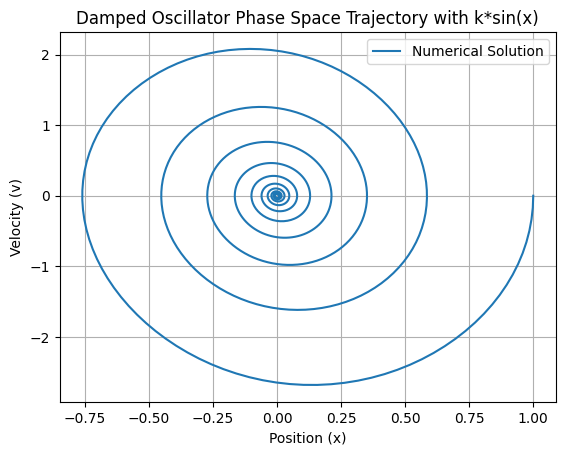

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def damped_oscillator_numerical(y, t, m, b, k):
    x, v = y
    dydt = [v, -b * v - k * np.sin(x) / m]
    return dydt

# Parameters
m = 1.0     # Mass
b = 0.5     # Damping coefficient
k = 10.0    # Spring constant

# Initial conditions
x0 = 1.0    # Initial displacement
v0 = 0.0    # Initial velocity
initial_conditions = [x0, v0]

# Time array
t = np.linspace(0, 20, 1000)

# Numerically solve the differential equation
solution = odeint(damped_oscillator_numerical, initial_conditions, t, args=(m, b, k))

# Extract position and velocity from the solution
x_numerical, v_numerical = solution[:, 0], solution[:, 1]

# Plot phase space trajectory
plt.plot(x_numerical, v_numerical, label='Numerical Solution')
plt.title('Damped Oscillator Phase Space Trajectory with k*sin(x)')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.grid(True)
plt.show()


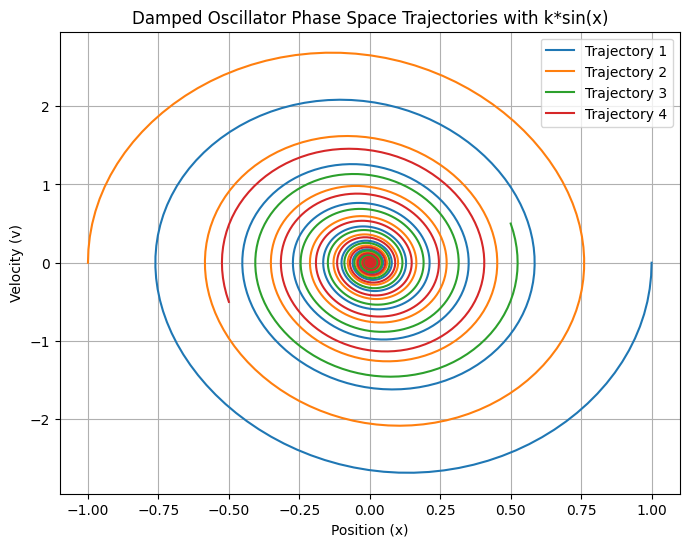

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def damped_oscillator_numerical(y, t, m, b, k):
    x, v = y
    dydt = [v, -b * v - k * np.sin(x) / m]
    return dydt

def generate_trajectories(initial_conditions, t, m, b, k):
    trajectories = []
    for ic in initial_conditions:
        solution = odeint(damped_oscillator_numerical, ic, t, args=(m, b, k))
        x, v = solution[:, 0], solution[:, 1]
        trajectories.append((x, v))
    return trajectories

# Parameters
m = 1.0     # Mass
b = 0.5     # Damping coefficient
k = 10.0    # Spring constant

# Generate multiple initial conditions
initial_conditions = [
    [1.0, 0.0],
    [-1.0, 0.0],
    [0.5, 0.5],
    [-0.5, -0.5],
]

# Time array
t = np.linspace(0, 20, 1000)

# Generate trajectories for different initial conditions
trajectories = generate_trajectories(initial_conditions, t, m, b, k)

# Plot phase space trajectories for different initial conditions
plt.figure(figsize=(8, 6))
for i, (x, v) in enumerate(trajectories):
    plt.plot(x, v, label=f'Trajectory {i + 1}')

plt.title('Damped Oscillator Phase Space Trajectories with k*sin(x)')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.legend()
plt.grid(True)
plt.show()


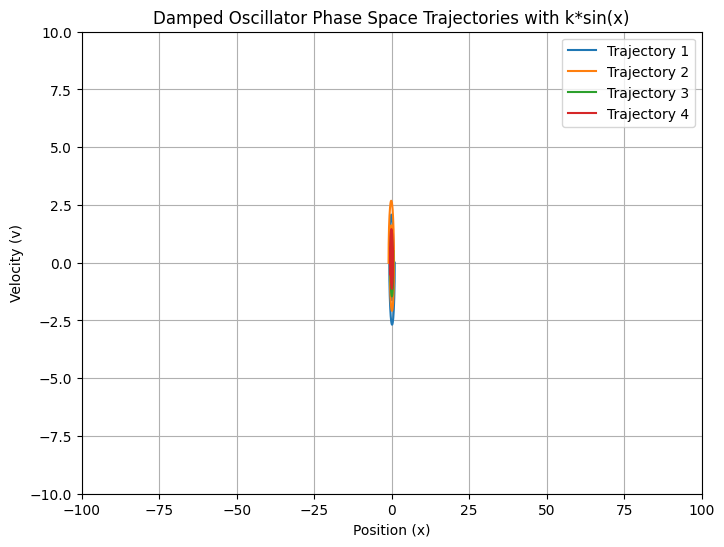

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def damped_oscillator_numerical(y, t, m, b, k):
    x, v = y
    dydt = [v, -b * v - k * np.sin(x) / m]
    return dydt

def generate_trajectories(initial_conditions, t, m, b, k):
    trajectories = []
    for ic in initial_conditions:
        solution = odeint(damped_oscillator_numerical, ic, t, args=(m, b, k))
        x, v = solution[:, 0], solution[:, 1]
        trajectories.append((x, v))
    return trajectories

# Parameters
m = 1.0     # Mass
b = 0.5     # Damping coefficient
k = 10.0    # Spring constant

# Generate multiple initial conditions
initial_conditions = [
    [1.0, 0.0],
    [-1.0, 0.0],
    [0.5, 0.5],
    [-0.5, -0.5],
]

# Time array with extended range
t = np.linspace(0, 20, 1000)

# Generate trajectories for different initial conditions
trajectories = generate_trajectories(initial_conditions, t, m, b, k)

# Plot phase space trajectories for different initial conditions
plt.figure(figsize=(8, 6))
for i, (x, v) in enumerate(trajectories):
    plt.plot(x, v, label=f'Trajectory {i + 1}')

plt.title('Damped Oscillator Phase Space Trajectories with k*sin(x)')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.xlim(-100, 100)  # Set x-axis limits
plt.ylim(-10, 10)    # Adjust y-axis limits as needed
plt.legend()
plt.grid(True)
plt.show()
